<a href="https://colab.research.google.com/github/Maratib-634/Sentimental-Analysis-on-Twitter/blob/main/Sentimental_Analysis_on_Twitter_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Information:**
The sentimental analysis is  being peforme on the twitter dataset. The results will be in three different positive, negative and neutral.

### Importing modules

In [ ]:
import cv2
import pandas as pd
import numpy as np
import re

### Dealing with Dataset

### 1.Importing Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data_Sets/CSV Files/Twitter Sentiments.csv')

In [ ]:
len(df)

31962

In [ ]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## **Preprocessing of Data**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


#### **1. Removing Twitter handles**

We will create a new **clean tweets** to contain all the tweets after whatever the preprocessing we do...

In [ ]:
#to check the columns of dataset
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

To remove the the tweets with twitter handles we will use the regualr expression lib for cheat sheet : https://www.rexegg.com/regex-quickstart.html. Here we will create a new column named as **clearn tweets** which will have all the tweets without [@..anyword..].

* ### **Remove pattern Function**
The purpose of this function is to contain **re.findall** *refer* :https://www.codecademy.com/resources/docs/python/regex/findall and **re.sub** *refer* :https://www.educative.io/answers/what-is-the-resub-function-in-python that will remove and replace the selected patterns


In [ ]:
def remove_pattern(input_txt,pattern):
  r= re.findall(pattern,input_txt)
  for word in  r:
    input_txt=re.sub(word," ", input_txt)
  return input_txt

2. #### **Removing @**

In [ ]:
df['clear_tweets']=np.vectorize(remove_pattern)(df['tweet'],"@\w]*")

In [ ]:
df.head()

,id,label,tweet,clear_tweets
0,1,0,@user when a father is dysfunctional and is s...,ser when a father is dysfunctional and is so...
1,2,0,@user @user thanks for #lyft credit i can't us...,ser ser thanks for #lyft credit i can't use ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


3. #### **Removing special characters,numbers and punctutations**

In [ ]:
df["clear_tweets"]=df['clear_tweets'].str.replace("[^a-zA-Z#]"," ")

<ipython-input-10-9cb580c55965>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["clear_tweets"]=df['clear_tweets'].str.replace("[^a-zA-Z#]"," ")


In [ ]:
df.head(200)

,id,label,tweet,clear_tweets
0,1,0,@user when a father is dysfunctional and is s...,ser when a father is dysfunctional and is so...
1,2,0,@user @user thanks for #lyft credit i can't us...,ser ser thanks for #lyft credit i can t use ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation
...,...,...,...,...
195,196,0,what a self-serving hypocrite! always keep you...,what a self serving hypocrite always keep you...
196,197,0,#nohcarolina bull up: you will dominate your...,#nohcarolina bull up you will dominate your...
197,198,0,#building polar bear climb racing: angry pol...,#building polar bear climb racing angry pol...
198,199,0,@user @user if they want reelection money. #ks...,ser ser if they want reelection money #ksleg


4. #### **Remove shortwords**

1. .apply() ref:https://www.geeksforgeeks.org/python-pandas-apply/ is being used to apply the function on every single value of "clear_tweets".
2. x.split() ref : https://www.programiz.com/python-programming/methods/string/split is being applied to split every entry being entered.
3. [w for w in.....] is a List Compression ref: https://www.programiz.com/python-programming/list-comprehension which has a condition len(w)>3

In [ ]:
df['clear_tweets'] = df['clear_tweets'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

Note : This  code is little Easier by using def function rather than apply ing lambda functions

In [ ]:
def remove_short_words(text):
    return " ".join([word for word in text.split() if len(word) > 3])

df['clear_tweets'] = df['clear_tweets'].apply(remove_short_words)

In [ ]:
df.head()

,id,label,tweet,clear_tweets
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


5. #### **Tokenization**

Now we will seprate all the entries from the tweets

In [ ]:
Tokenized_tweets=df['clear_tweets'].apply(lambda x: x.split())

In [ ]:
Tokenized_tweets.head(10)

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
5    [huge, fare, talking, before, they, leave, cha...
6                           [camping, tomorrow, danny]
7    [next, school, year, year, exams, think, about...
8    [love, land, #allin, #cavs, #champions, #cleve...
9                                      [welcome, here]
Name: clear_tweets, dtype: object



```
# This is formatted as code
```

**5.  Stemminng the word**

Stemming the word is returnning the word to  its base or original word like running to run or stunned to stun etc

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

Tok_tweets = Tokenized_tweets.apply(lambda sentence: [stemmer.stem(word) for word in sentence])

In [ ]:
Tok_tweets.head(100)

0     [when, father, dysfunct, selfish, drag, kid, i...
1     [thank, #lyft, credit, caus, they, offer, whee...
2                               [bihday, your, majesti]
3                      [#model, love, take, with, time]
4                          [factsguid, societi, #motiv]
                            ...                        
95    [alway, hope, that, think, that, gonna, happen...
96                     [#model, love, take, with, time]
97                   [coupl, have, nake, japanes, girl]
98    [#hump, that, #hump, #humper, edwardsvil, penn...
99        [personalis, here, #shop, #cool, #home, #fun]
Name: clear_tweets, Length: 100, dtype: object

6. #### **Removing Tokenization or combining words in single sentences**

In [ ]:
for i in range(len(Tok_tweets)):
  Tok_tweets[i]=" ".join(Tok_tweets[i])
df['clear_tweets']=Tok_tweets

In [ ]:
df.head()


,id,label,tweet,clear_tweets
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


# **Exploratory Data Analysis**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install wordcloud

1. #### **Creating Wordcloud**
It will visually represent the frequency of words more frequent word is more visual it will be

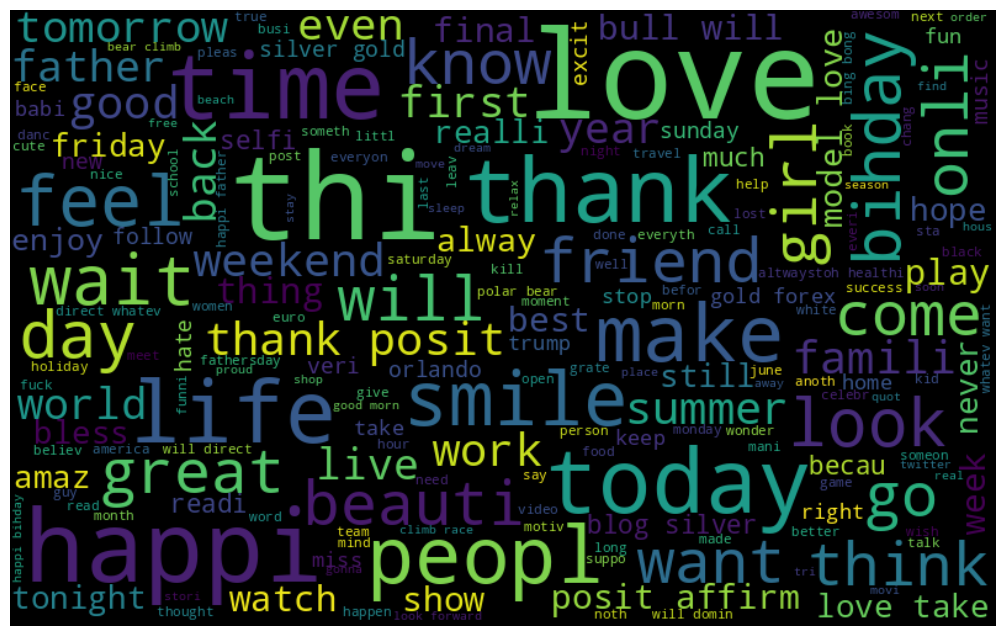

In [ ]:
all_words=" ".join(sen for sen in df['clear_tweets'])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

 #### **1.1 Word Visulization for +ve**

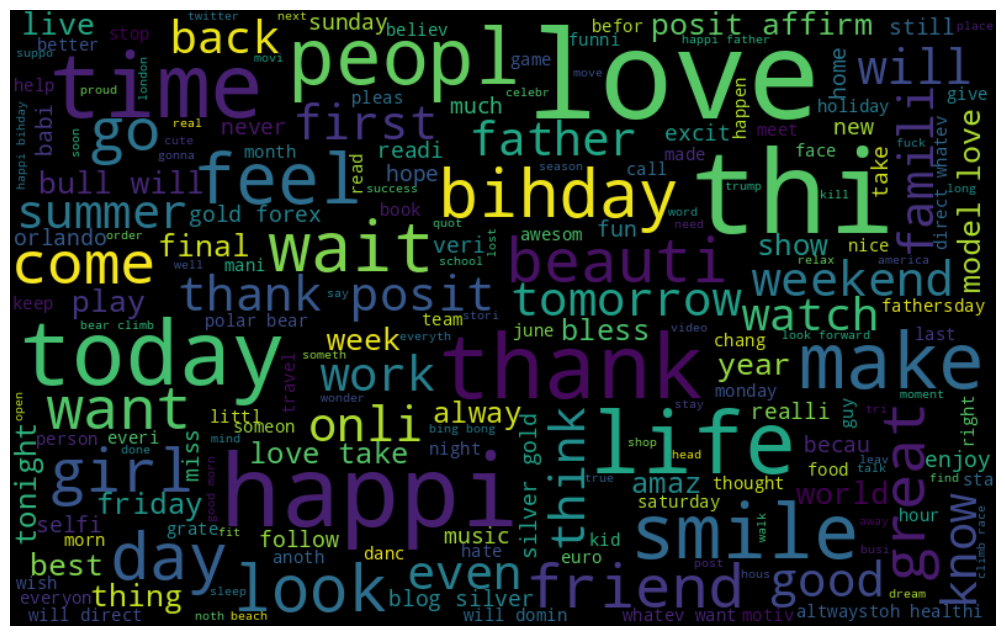

In [ ]:
all_words = " ".join([sentence for sentence in df['clear_tweets'][df['label']==0]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

 #### **1.2 Word Visulization for -ve**

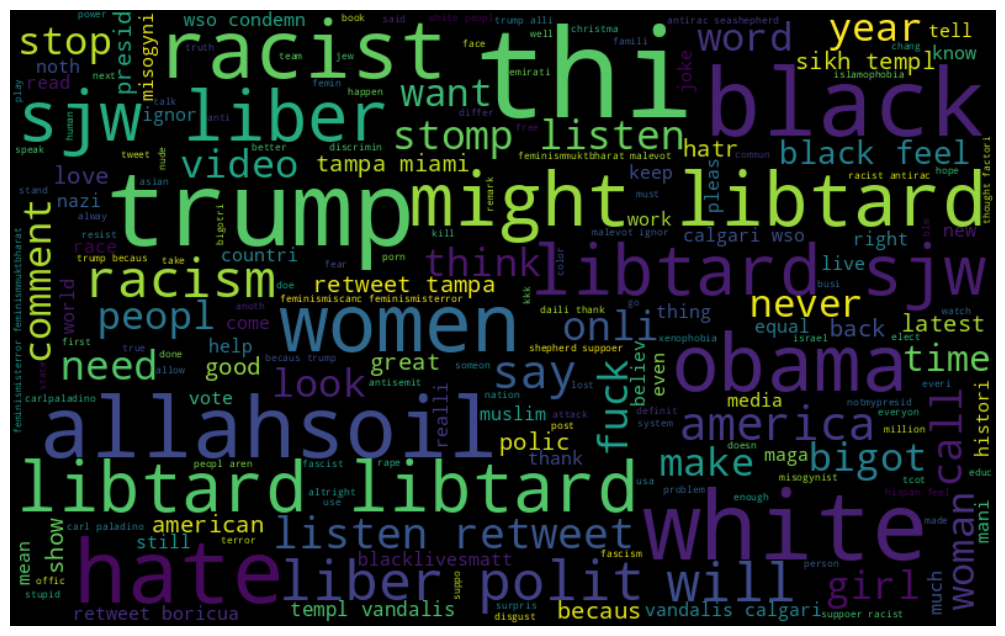

In [ ]:
all_words = " ".join([sentence for sentence in df['clear_tweets'][df['label']==1]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

2. #### **Removing Hashtags**

In [ ]:
#creating function
def remove_hashtags(tweets):
  hashtags=[]
  for tweet in tweets:
    ht=re.findall(r"#(\w+)",tweet)
    hashtags.append(ht)
  return hashtags


##### **2.1 Hashtags from Non_racist/sexist tweets/positive**

In [ ]:
ht_positive=remove_hashtags(df['clear_tweets'][df['label']==0])

##### **2.2 Hashtags from racist/sexist tweets/negative**

In [ ]:
ht_negative=remove_hashtags(df['clear_tweets'][df['label']==1])

##### **2.3 Flatterning the nested list**

In [ ]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

##### 2.4 **Freq Distribution of Hashtags for positive tweets**

In [ ]:
import nltk

Here we will be using nltk Frequency Distribution and Then we will create a dataframe in which we will have Dictionary containing two values "hashtags":keys and "counts":values

In [ ]:
freq=nltk.FreqDist(ht_positive)
d_pos=pd.DataFrame({'Hashtag_pos':list(freq.keys()),
               'Count_pos':list(freq.values())})

##### 2.5 **Freq Distribution of Hashtags for negative tweets**

In [ ]:
freq=nltk.FreqDist(ht_negative)
d_neg=pd.DataFrame({'Hashtag_neg':list(freq.keys()),
               'Count_neg':list(freq.values())})

3. ####  **selecting Top 10  Hashtags**

##### 3.1 **Positive Hashtags**

In [ ]:
import seaborn as sns

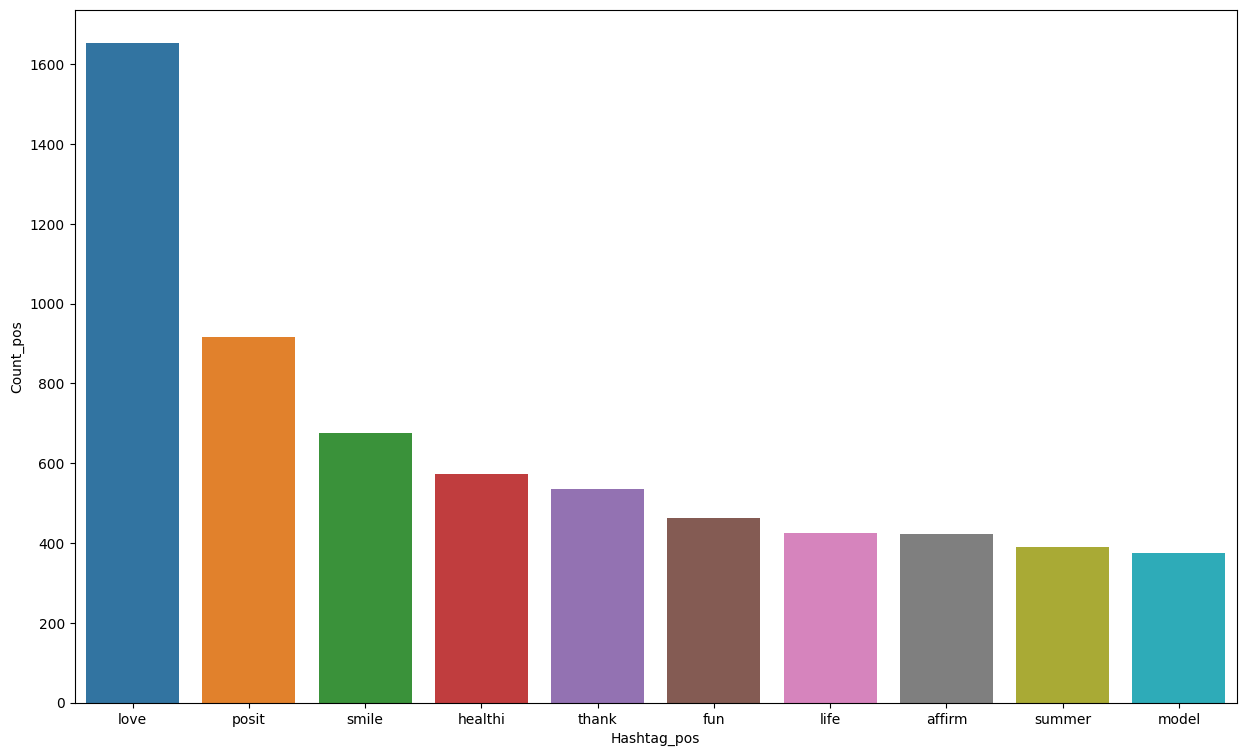

In [ ]:
d=d_pos.nlargest(columns='Count_pos',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag_pos',y='Count_pos')
plt.show()

##### 3.2 **Negative Hashtags**

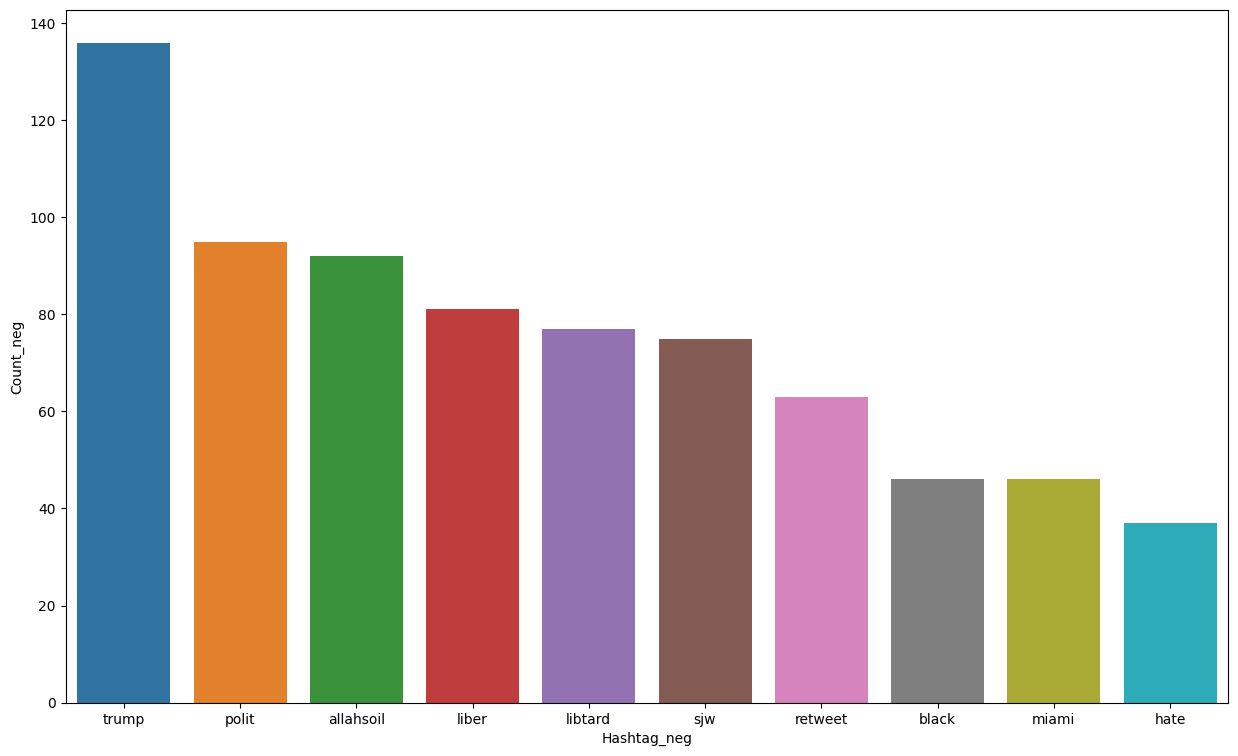

In [ ]:
d=d_neg.nlargest(columns='Count_neg',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag_neg',y='Count_neg')
plt.show()

#**Input Split**

About Count Vectorizer :https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c

In [ ]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clear_tweets'])

Now we have ready our training data in form varirable "bow" which are all numeric values and our testing data will be labels [0,1] which will be stored in label columns

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

# **Model Traininig**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

### **Training**

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

### **Testing**

In [ ]:
pred=model.predict(x_test)
f1_score(y_test,pred)

0.49763033175355453

In [ ]:


accuracy_score(y_test,pred)



0.9469403078463271